# Loading from drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('../Greyatom',force_remount=True)

Mounted at ../Greyatom


In [ ]:
cd ../Greyatom/'My Drive'/'my first book'/'capstone project'

/Greyatom/My Drive/my first book/capstone project


In [ ]:
ls

 Cusomer_Cleaned.csv            Invoice_Data.csv
 Customer_Data.csv              JTD_Cleaned.csv
'customer datas legend .xlsx'   JTD.csv
 Final_invoice.csv             'Mahindra problem description of the data.docx'
 Invoice_Cleaned.csv            Plant_Cleaned.csv
'Invoice customer plant.csv'   'Plant Master_real.xlsx - Sheet1.csv'


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly


import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

# Loading Files

In [ ]:
#cleaned invoice data
inv=pd.read_csv('Invoice_Cleaned.csv')
inv=inv.drop(columns=['Unnamed: 0'])
inv['Customer No.'] = inv['Customer No.'].str.lstrip('0')


inv.head()


CITY Cust Type Customer No.  ... Service_Time  Job Month  Job Year
0     Thane    Retail        67849  ...   477.014722         12      2014
1     THNAE    Retail        84419  ...    19.920556          1      2015
2  THANE[W]    Retail        81055  ...    23.536944          1      2015
3     THNAE    Retail        84419  ...     1.470000          1      2015
4     THANE    Retail        18980  ...    25.359722          1      2015

[5 rows x 27 columns]

In [ ]:
#cleaned customer data
customer=pd.read_csv('Cusomer_Cleaned.csv')
customer=customer.drop(columns=['Unnamed: 0','Business Partner'])

customer['Customer No.'] = customer['Customer No.'].astype(str)
customer['Data Origin'].value_counts()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.



Reference - Customer                149997
Reference - Employee                121660
Camp - Outdoor                       63237
Camp - Workshop                      38326
Fleet                                36801
Spotted the outlet                   29780
Other outdoor activity               28828
Outdoor Sales Activity               15382
Hoardings/Outdoor Advertisements     13967
Just Dial/Other helpline             12122
Newspaper AD                          8118
Float activity                        8023
Company website                       6260
Newspaper leaflet                     5685
Emailers                              5082
Insurance Company                     4014
Petrol pump activity                  3840
Reference - Used car dealer           2069
Television AD                          745
Snapdeal/Other websites                735
Mahindra Sister concern Employee       590
Radio                                   77
Name: Data Origin, dtype: int64

In [ ]:
#cleaned jtd data
jtd=pd.read_csv('JTD_Cleaned.csv')
jtd=jtd.drop(columns=['Unnamed: 0'])

jtd.head()

DBM Order           Material  ... Target quantity UoM Net value
0      22385        OSLCC_SRV31  ...                 MIN   1869.87
1      23910    1DM279018170117  ...                  EA   2151.13
2      23910      1IS150203BE01  ...                  EA   2552.92
3      23910    1DM279001990173  ...                  EA  20360.14
4      23910  1DM88552790S001SA  ...                  EA  10691.63

[5 rows x 7 columns]

In [ ]:
plant=pd.read_csv('Plant_Cleaned.csv')
plant=plant.drop(columns=['Unnamed: 0'])

plant.head()

Plant                          Name 1  ...       City          State
0  BC07                      NERKUNDRAM  ...    Chennai     Tamil Nadu
1  BC30              SAS NAGAR - MOHALI  ...     Mohali         Punjab
2  X001       X001 - AUTO PLANET WHEELS  ...      Thane    Maharashtra
3  X002  X002 - BHANDARI INDUSTRIES PVT  ...  Ghaziabad  Uttar Pradesh
4  X003  X003 - Om Sri Satya Sai Automo  ...  Bengaluru      Karnataka

[5 rows x 6 columns]

In [ ]:
#jtd_grouped=jtd.groupby(['DBM Order','Item Category'],as_index=False).agg({"Net value":'sum',"Order Quantity":"sum"})
#inv_jtd=pd.merge(inv,jtd_grouped,how="left",left_on='Job Card No',right_on='DBM Order')

inv_cust=pd.merge(inv,customer,on='Customer No.',how='left')
inv_plant=pd.merge(inv,plant,on='Plant',how='left')
inv_cust_plant=pd.merge(inv_cust,plant,on='Plant',how='left')

#inv_jtd_customer=pd.merge(inv_jtd,customer,how='left',on='Customer No.')
#combined_data=pd.merge(inv_jtd_customer,plant,on='Plant',how='left')


In [ ]:

#fig = px.line(rev, x="Job Year", y="Total Amt Wtd Tax.", color='State')
#fig.show()

In [ ]:
for i in inv_cust_plant['State'].value_counts().index:
 print( i,inv_cust_plant[inv_cust_plant['State']==i].groupby('Job Year')['Make'].count())
 print('*'*60)


Maharashtra Job Year
2012    11152
2013    20213
2014    31214
2015    34612
2016    36525
Name: Make, dtype: int64
************************************************************
Tamil Nadu Job Year
2012     3719
2013    10274
2014    14952
2015    36480
2016    48925
Name: Make, dtype: int64
************************************************************
Karnataka Job Year
2013     3407
2014     5696
2015     9446
2016    25757
Name: Make, dtype: int64
************************************************************
Uttar Pradesh Job Year
2013     3211
2014    14917
2015     9732
2016     8111
Name: Make, dtype: int64
************************************************************
Telangana Job Year
2012    2830
2013    8056
2014    7385
2015    5509
2016    6733
Name: Make, dtype: int64
************************************************************
Gujarat Job Year
2012    1047
2013    6532
2014    6761
2015    5337
2016    6224
Name: Make, dtype: int64
********************************************

In [ ]:
rev=inv_cust_plant.groupby(['State'],as_index=False).agg({'Plant':'nunique','Make':'count','Total Amt Wtd Tax.':'sum'}).sort_values(by='Total Amt Wtd Tax.',ascending=False)
rev['Percentage Share']=(rev['Total Amt Wtd Tax.']/rev['Total Amt Wtd Tax.'].sum())*100
rev['Order Share']=(rev['Make']/rev['Make'].sum())*100


In [ ]:
inv_cust_plant.to_csv('Invoice customer plant.csv')

In [ ]:
inv_cust_plant.isnull().sum()/len(inv_cust_plant)

CITY                       0.000000
Cust Type                  0.000000
Customer No.               0.000000
District                   0.000000
Invoice No                 0.000000
Job Card No                0.000000
KMs Reading                0.000000
Labour Total               0.000000
Make                       0.000000
Misc Total                 0.000000
Model                      0.000000
OSL Total                  0.000000
Order Type                 0.000000
Parts Total                0.000000
Pin code                   0.000000
Plant                      0.000000
Plant Name1                0.000000
Print Status               0.000000
Recovrbl Exp               0.000000
Regn No                    0.000000
Total Amt Wtd Tax.         0.000000
User ID                    0.000000
Invoice_DateTime           0.000000
JobCard_DateTime           0.000000
Service_Time               0.000000
Job Month                  0.000000
Job Year                   0.000000
Partner Type               0

In [ ]:
inv_cust_plant=inv_cust_plant.drop(columns=['Name 1','House number and street','PO Box'])

In [ ]:
inv_cust_plant.shape

(492314, 31)

# **EDA** 

# Revenue Analysis

1.   Year Wise revenue Analysis
2.   Order Wise revenue Analysis
3.   Make wise revenue Analysis
4.   State wise revenus Analyise



In [ ]:
year_income=inv_cust_plant.groupby(['Job Year','Job Month'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(year_income, x="Job Month", y="Total Amt Wtd Tax.", color='Job Year')
fig.show()

In [ ]:
order_income=inv_cust_plant.groupby(['Job Year','Order Type'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(order_income, x="Job Year", y="Total Amt Wtd Tax.", color='Order Type')

fig.update_layout(title='Year Wise Order Revenue')

fig.show()

In [ ]:
make_income1=make_income=inv_cust_plant.groupby(['Make'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.bar(make_income1, x="Make", y="Total Amt Wtd Tax.", color='Make')

fig.update_layout(title=' Make/Car Revenue')

fig.show()

In [ ]:
make_income=inv_cust_plant.groupby(['Job Year','Make'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(make_income, x="Job Year", y="Total Amt Wtd Tax.", color='Make')

fig.update_layout(title='Year Wise Make/Car Revenue')

fig.show()

In [ ]:
state_income=inv_cust_plant.groupby(['Job Year','State'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(state_income, x="Job Year", y="Total Amt Wtd Tax.", color='State')

fig.update_layout(title='State wise Revenue')

fig.show()
#model_income.sort_values(by='Total Amt Wtd Tax.',ascending=False)

# Source Income 

In [ ]:
#source affecting to more income 
source_income=inv_cust_plant.groupby(['Job Year','Data Origin'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(source_income, x="Job Year", y="Total Amt Wtd Tax.", color='Data Origin')

fig.update_layout(title='Source wise income ')

fig.show()
#model_income.sort_values(by='Total Amt Wtd Tax.',ascending=False)

# Labour Revenue Analysis?


In [ ]:

# Mean labour charges according to each order 
labour_charge=inv_cust_plant[['Labour Total','Order Type']]
lab=pd.DataFrame(labour_charge.groupby(['Order Type'])['Labour Total'].mean()).rename(columns={'Labour total':'Mean Labour Cost'}).reset_index()
lab.head()

Order Type  Labour Total
0       Accidental   4885.251306
1       Mechanical   1085.795634
2     Paid Service   1506.658535
3     Repeat Order      0.295761
4  Running Repairs    797.417464

In [ ]:
inv_cust_plant['Make'].value_counts().head(6).values

array([147102,  87356,  85342,  58034,  29092,  21616])

In [ ]:
fig = px.bar(y=inv_cust_plant['Make'].value_counts().head(10).values, x=inv_cust_plant['Make'].value_counts().head(10).index)
fig.update_layout(template='ggplot2', title="Top Car Make Count")

fig.show()

In [ ]:
fig = px.bar(lab, y='Labour Total', x='Order Type')
fig.update_layout(template='ggplot2', title="Mean Labour charges for various order type")

fig.show()


In [ ]:
labor_year_income=inv_cust_plant.groupby(['Job Year','Job Month'],as_index=False)['Labour Total'].sum()


fig = px.line(labor_year_income, x="Job Year", y="Labour Total", color='Job Month')
fig.update_layout(template='ggplot2', title="labor Charges For various months ")
fig.show()

In [ ]:
month_income=inv_cust_plant.groupby(['Job Month'],as_index=False)['Labour Total'].sum()


fig = px.line(month_income, x="Job Month", y="Labour Total")
fig.update_layout(template='ggplot2', title="Overall Labor costing during various months ")
fig.show()


In [ ]:
order_year_income=inv_cust_plant.groupby(['Order Type','Job Year'],as_index=False)['Labour Total'].sum()


fig = px.line(order_year_income, x="Job Year", y="Labour Total", color='Order Type')
fig.update_layout(template='ggplot2', title="labor Charges For various order in all years ")
fig.show()

## Total number of plants in each state

In [ ]:
#total number of plants in each states
state=pd.crosstab(columns=plant['State'],index='Plant')
state.head()

State  Andhara Pradesh  Andhra Pradesh  ...  Uttarakhand  West Bengal
row_0                                   ...                          
Plant                1              15  ...            9           14

[1 rows x 28 columns]

In [ ]:
city=pd.crosstab(columns=plant['City'],index='Plant')
city.head()

City   Abohar  Agra  Ahmednagar  ...  Yavatmal  Yeshwantpur - Banglore  Zirakpur
row_0                            ...                                            
Plant       1     3           1  ...         1                       1         1

[1 rows x 377 columns]

## Number of plants in each city

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



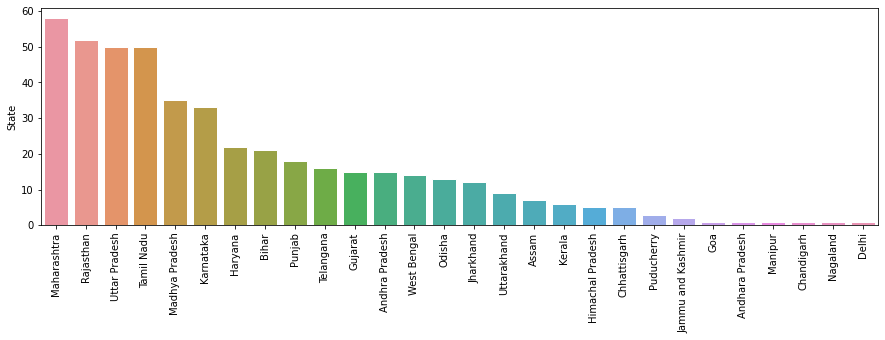

In [ ]:
#graphical representation of number of plants in each state
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.set(style='darkgrid')
ax=sns.barplot(plant['State'].value_counts().index,plant['State'].value_counts())

In [ ]:
trace4 = go.Bar(
                y =plant['State'].value_counts().values  ,
                x = plant['State'].value_counts().index,
                name = "Plant Count",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))




fig = go.Figure(data = [trace4])

fig.update_layout(template='ggplot2', title="Plant Count in various state")

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



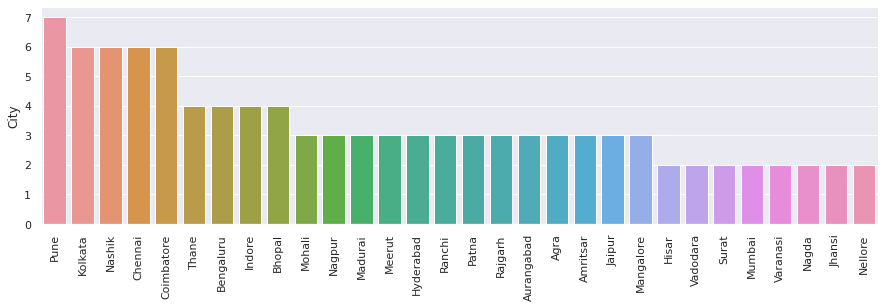

In [ ]:
#graphical representation of number of plants in each city
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.set(style='darkgrid')
ax=sns.barplot(plant['City'].value_counts().head(30).index,plant['City'].value_counts().head(30))

## Number of plants according to various zones

In [ ]:
#divide states into zones 
northern_zone       =['Chandigarh','Delhi','Haryana','Himachal Pradesh','Jammu and Kashmir','Ladakh'
                     ,'Punjab','Rajasthan','Uttarakhand','Uttar Pradesh']

north_eastern_Zone  =[  ]

eastern_zone        =['Bihar', 'Jharkhand', 'Odisha','West Bengal','Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland']

central_western_zone=['Madhya Pradesh', 'Chhattisgarh', 'Goa', 'Gujarat', 'Maharashtra']

southern_zone       =[ 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu','Telangana']


In [ ]:
f1=plant['State'].isin(northern_zone)
f2=plant['State'].isin(eastern_zone)
f3=plant['State'].isin(central_western_zone)
f4=plant['State'].isin(southern_zone)
#filt5=plant['State'].isin(north_eastern_Zone)

n_state    =plant.loc[f1]
e_state     =plant.loc[f2]
c_w_state=plant.loc[f3]
s_state    =plant.loc[f4]
#north_east_state=plant.loc[filt5]


In [ ]:
n_state

Plant                          Name 1  ...                  City          State
1    BC30              SAS NAGAR - MOHALI  ...                Mohali         Punjab
3    X002  X002 - BHANDARI INDUSTRIES PVT  ...             Ghaziabad  Uttar Pradesh
22   X025     X025 - SHIVALIK AUTOMOBILES  ...                  Moga         Punjab
26   X029  X029 - SWAMI AUTO CARE PVT LTD  ...              Zirakpur         Punjab
35   X041   X041 - VARDAJYOTI AUTOMOBILES  ...                Meerut  Uttar Pradesh
..    ...                             ...  ...                   ...            ...
460  BC27                             NaN  ...    GT Road - Ludhiana         Punjab
461  BC28                             NaN  ...             Noida- 63  Uttar Pradesh
462  BC29                             NaN  ...            Noida - 05  Uttar Pradesh
464  BC32                             NaN  ...  Gill Road - Ludhiana         Punjab
465  BC33                             NaN  ...            Panchkulla        Haryana

[160 rows x 6 columns]

In [ ]:
trace1=go.Bar(
                y = n_state['State'].value_counts().values,
                x = n_state['State'].value_counts().index,
                name = "Northern Zone",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =s_state['State'].value_counts().values,
                x = s_state['State'].value_counts().index,
                name = "Southern Zone",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =e_state['State'].value_counts().values  ,
                x = e_state['State'].value_counts().index,
                name = "Eastern Zone",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =c_w_state['State'].value_counts().values  ,
                x = c_w_state['State'].value_counts().index,
                name = "Central and Western Zone",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))




fig = go.Figure(data = [trace1,trace2,trace3,trace4])

fig.update_layout(template='ggplot2', title="Plant Count in various state")


In [ ]:

#fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(16.5,10))

#sns.barplot(north_state['State'].value_counts().values,north_state['State'].value_counts().index,ax=axs[0,0])
#axs[0,0].set_title('Northern Zone')

#sns.barplot(east_state['State'].value_counts().values,east_state['State'].value_counts().index,ax=axs[0,1])
#axs[0,1].set_title('Eastern Zone')

#sns.barplot(cent_west_state['State'].value_counts().values,cent_west_state['State'].value_counts().index,ax=axs[1,0])
#axs[1,0].set_title('Cental & Western Zone')

#sns.barplot(south_state['State'].value_counts().values,south_state['State'].value_counts().index,ax=axs[1,1])
#axs[1,1].set_title('Southern Zone')

#sns.barplot(north_east_state['State'].value_counts().values,north_east_state['State'].value_counts().index,ax=axs[2,0])
#axs[2,0].set_title('North Eastern Zone')


# Location Based Analysis

In [ ]:
#k=inv_plant[inv_plant['State']=='Maharashtra']

#for i in ['CITY','City','State','District','Regn No']:
 # print(k[i].value_counts())
  #print('*'*80)

In [ ]:
inv_plant.shape

(492314, 32)

In [ ]:

 
#city=[]
#state=[]
#car_count=[]
 
#for i in loc1['City'].unique():
 #  city.append(i)
  # car_count.append(len(loc1[loc1['City']==i]['Regn No'].value_counts()))
   #state.append(loc1[loc1['City']==i]['State'].value_counts().index)
    #print('*'*60)


#k=loc[loc['State']=='Kerala']
#len(k[k['City']=='Kottayam']['Regn No'].value_counts())

In [ ]:
#plant_most_cars=pd.DataFrame({'City':city,'State':state,'Total Unique Cars':car_count})

In [ ]:
#plant_most_cars.sort_values(by=['Total Unique Cars'],inplace=True,ascending=False)
#plant_most_cars

In [ ]:
#sns.barplot(plant_most_cars['Total Unique Cars'].head(10),plant_most_cars['City'].head(10))

In [ ]:

 
filt1=inv_plant['State'].isin(northern_zone)
north_state=inv_plant.loc[filt1]


filt2=inv_plant['State'].isin(eastern_zone)
east_state=inv_plant.loc[filt2]


filt3=inv_plant['State'].isin(central_western_zone)
cent_west_state=inv_plant.loc[filt3]

filt4=inv_plant['State'].isin(southern_zone)
south_state=inv_plant.loc[filt4]


# **Which** **make** **and** **model** **is** **more** popular?

1.   Make popular in various zones
2.   Model popular in various zone 
3.   Make with most sales





In [ ]:
#graphical representation of famous makes among various zones 

from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=2)
#for northern zone 
fig.add_trace(go.Bar(
                y = north_state['Make'].value_counts().head(5).values,
                x = north_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              1, 1)
fig.add_trace(go.Bar(
                y = north_state['Model'].value_counts().head(5).values,
                x = north_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              1, 2)
fig.update_xaxes(title_text="Make count('northern Zone )", row=1, col=1)
fig.update_xaxes(title_text="Model count('northern Zone )", row=1, col=2)

#figure for eastern zone 
fig.add_trace(go.Bar(
                y = east_state['Make'].value_counts().head(5).values,
                x = east_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              2, 1)
fig.add_trace(go.Bar(
                y = east_state['Model'].value_counts().head(5).values,
                x = east_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              2, 2)
fig.update_xaxes(title_text="Make count('Eastern Zone )", row=2, col=1)
fig.update_xaxes(title_text="Model count('Eastern Zone )", row=2, col=2)

#figure for southern zone 
fig.add_trace(go.Bar(
                y = south_state['Make'].value_counts().head(5).values,
                x = south_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              3, 1)
fig.add_trace(go.Bar(
                y = south_state['Model'].value_counts().head(5).values,
                x = south_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              3, 2)
fig.update_xaxes(title_text="Make count('Southern Zone )", row=3, col=1)
fig.update_xaxes(title_text="Model count('Southern Zone )", row=3, col=2)

#figure for centeral and western zone 
fig.add_trace(go.Bar(
                y = cent_west_state['Make'].value_counts().head(5).values,
                x = cent_west_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              4, 1)
fig.add_trace(go.Bar(
                y = cent_west_state['Model'].value_counts().head(5).values,
                x = cent_west_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              4, 2)
fig.update_xaxes(title_text="Central & Western Zone )", row=4, col=1)
fig.update_xaxes(title_text="Central & Western Zone )", row=4, col=2)

fig.update_layout(template='ggplot2', title="Zonal Count",height=1100, width=1100)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [ ]:
#sns.scatterplot(inv_plant[inv_plant["Make"]=="PORCHE"]["Total Amt Wtd Tax."],inv_cust_plant['Total Amt Wtd Tax.'])



# which area has most cars?


1.   Zone wise 
2.   Top 5 States






In [ ]:
#according to zones
data=[['Northern Zone',north_state['Make'].count()],['Eastern Zone',east_state['Make'].count()],
      ['Central & Western Zone',cent_west_state['Make'].count()],['Southern Zone',south_state['Make'].count()]]
overall=pd.DataFrame(data,columns=['Zones','Count'])
overall.head()

Zones   Count
0           Northern Zone  100139
1            Eastern Zone    7292
2  Central & Western Zone  173905
3           Southern Zone  202347

In [ ]:
import plotly.graph_objects as go
#graphical representation of most cars in various zones
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=overall['Zones'],
                             values=overall['Count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template='ygridoff', title="Zone Wise Car Count")

fig.show()


In [ ]:

#overall car count in each state
car1=[]
state1=[]
for i in inv_plant['City'].unique():
  car1.append(inv_plant[inv_plant['City']==i]['Make'].count())
  state1.append(i)

df1=pd.DataFrame({'States':state1,'car count':car1})
df1=df1.sort_values(by='car count',ascending=False)
df1

States  car count
2       Nashik      31401
0        Thane      21871
5      Chennai      21675
20      Nagpur      15778
1         Pune      14301
..         ...        ...
203     Bazpur         11
185  Sambalpur          8
202  Srirampur          5
201  Tikamgarh          2
205     Hatras          1

[206 rows x 2 columns]

In [ ]:
#state wise count

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df1['States'][0:10],
                             values=df1['car count'][0:10])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template='ggplot2')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

# which service structure is popular in different zones ?



1.   Northern Zone 
2.   Eastern Zone 
3.   Central and western Zone
4.   Southern Zone 







## **Northern** Zone

In [ ]:
one=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Uttar Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Haryana'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Punjab'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Uttarakhand'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Himachal Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()




six=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Rajasthan'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
six=six.rename(columns={'Order Type':'count'})
six=six.reset_index()


seven=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Chandigarh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
seven=seven.rename(columns={'Order Type':'count'})
seven=seven.reset_index()


In [ ]:
north_state['Order Type'].value_counts()

Running Repairs      54041
Paid Service         23461
Accidental            8985
SMC Redemption        6165
SMC Value Package     3521
Mechanical            2919
Repeat Order          1030
WBW Order               16
Workshop Damage          1
Name: Order Type, dtype: int64

In [ ]:
trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Uttar Pradesh",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Haryana",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Punjab",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Uttarakhand",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Himachal Pradesh",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace6 = go.Bar(
                y =six['count']  ,
                x = six['Order Type'],
                name = "Rajasthan",
                marker = dict(color = 'goldenrod',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace7 = go.Bar(
                y =seven['count']  ,
                x = seven['Order Type'],
                name = "Chandigarh",
                marker = dict(color = 'darksalmon',
                         line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7])
fig.update_layout(template='plotly_dark', title="Famous order typ in Northern Zone")

iplot(fig)

## Central and Western Zone 

In [ ]:
one=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Maharashtra'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()



two=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Gujarat'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Madhya Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Chhattisgarh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()

Order Type  count
0     Paid Service    380
1  Running Repairs    147
2       Accidental     71

In [ ]:
trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Maharashtra",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Gujarat",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Rajasthan",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Chhattisgarh",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))


fig = go.Figure(data = [trace1,trace2,trace3,trace4])
fig.update_layout(template='plotly_dark', title="Famous order in Central & Western Zone")

iplot(fig)

## eastern and north eastern zone 

In [ ]:
one=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Bihar'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['West Bengal'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Odisha'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Jharkhand'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Assam'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()


In [ ]:


trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Bihar",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "West Bengal",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Odisha",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Jharkhand",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Assam",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5])
fig.update_layout(template='plotly_dark', title="Famous order in North Eastern Zone")

iplot(fig)

## Southern Zone 

In [ ]:
one=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Telangana'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Tamil Nadu'])
#one=pd.DataFrame(loc1groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Karnataka'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Puducherry'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Andhra Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()


six=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Kerala'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
six=six.rename(columns={'Order Type':'count'})
six=six.reset_index()



In [ ]:



trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Telangana",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Tamil Nadu",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Karnataka",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Puducherry",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Andhra Pradesh",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace6 = go.Bar(
                y =six['count']  ,
                x = six['Order Type'],
                name = "Kerala",
                marker = dict(color = 'goldenrod',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

#trace7 = go.Bar(
 #               y =seven['count']  ,
  #              x = seven['Order Type'],
   #             name = "Chandigarh",
    #            marker = dict(color = 'darksalmon',
     #                    line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5,trace6])
fig.update_layout(template='plotly_dark', title="Famous order in Southern Zone")

iplot(fig)

# Service Structure for particular car ?

In [ ]:
one=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Running Repairs']
one=one.rename(columns={'Make':'count'})
one=one.reset_index()
one

two=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Accidental']
two=two.rename(columns={'Make':'count'})
two=two.reset_index()
two

three=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Mechanical']
three=three.rename(columns={'Make':'count'})
three=three.reset_index()
three

Make  count
0          MARUTI SUZUKI   4416
1   MAHINDRA &  MAHINDRA   2842
2                HYUNDAI   2423
3            TATA MOTORS   1786
4         GENERAL MOTORS    870
5                   FORD    669
6                 TOYOTA    658
7                  HONDA    393
8                  SKODA    228
9             VOLKSWAGEN    227
10                  FIAT    194
11               RENAULT    173
12                NISSAN    115
13     MITSUBISHI MOTORS     42
14                DAEWOO     13
15                 FORCE     12
16      HINDUSTAN MOTORS     10
17                  AUDI      8
18              SONALIKA      7
19         MERCEDES BENZ      5
20   PREMIER AUTOMOBILES      4
21                   BMW      4
22                  JEEP      1

In [ ]:



trace1=go.Bar(
                y = one['count'][0:5],
                x = one['Make'][0:5],
                name = "Running repairs",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'][0:5],
                x = two['Make'][0:5],
                name = "Accidental",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count'][0:5]  ,
                x = three['Make'][0:5],
                name = "Mechanical",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


fig = go.Figure(data = [trace1,trace2,trace3])
fig.update_layout(template='ggplot2', title="Famous order among cars")

iplot(fig)

# Seasonal Orders

1.   Year Wise Analysis
2.   Overall Ananlysis



## Year Wise

In [ ]:
for_2012=inv_cust_plant[inv_cust_plant['Job Year']==2012]
for_2013=inv_cust_plant[inv_cust_plant['Job Year']==2013]
for_2014=inv_cust_plant[inv_cust_plant['Job Year']==2014]
for_2015=inv_cust_plant[inv_cust_plant['Job Year']==2015]
for_2016=inv_cust_plant[inv_cust_plant['Job Year']==2016]


In [ ]:
for_2012['Total Amt Wtd Tax.'].sum(),for_2012['Total Amt Wtd Tax.'].mean(),for_2012['Total Amt Wtd Tax.'].median()

(89797907.82000001, 4789.732655216496, 2440.3450000000003)

In [ ]:
for_2013['Total Amt Wtd Tax.'].sum(),for_2013['Total Amt Wtd Tax.'].mean(),for_2013['Total Amt Wtd Tax.'].median()

(234278378.20999998, 4165.689512980153, 1828.495)

In [ ]:
for_2014['Total Amt Wtd Tax.'].sum(),for_2014['Total Amt Wtd Tax.'].mean(),for_2014['Total Amt Wtd Tax.'].median()

(401674583.46, 4193.852213579761, 1395.46)

In [ ]:
for_2015['Total Amt Wtd Tax.'].sum(),for_2015['Total Amt Wtd Tax.'].mean(),for_2015['Total Amt Wtd Tax.'].median()

(604734486.3300002, 4822.71328008673, 1540.55)

In [ ]:
for_2016['Total Amt Wtd Tax.'].sum(),for_2016['Total Amt Wtd Tax.'].mean(),for_2016['Total Amt Wtd Tax.'].median()

(833227015.44, 4247.777358020408, 1142.945)

In [ ]:
inv_cust_plant['Job Year'].value_counts().sort_index().index

Int64Index([2012, 2013, 2014, 2015, 2016], dtype='int64')

In [ ]:
for i in inv_cust_plant['Job Year'].value_counts().sort_index().index:
  year=inv_cust_plant[inv_cust_plant['Job Year']==i]
  rain=[6,7,8,9]
  filt=year['Job Month'].isin(rain)
  rain_data=year.loc[filt]
###creating dataframes of season wise analysis of order type
###for rain season:
  rain_df=pd.DataFrame(rain_data['Order Type'].value_counts())
  rain_df=rain_df.rename(columns={'Order Type':'count'})
  rain_df=rain_df.reset_index()
  rain_df=rain_df.rename(columns={'index':'order type'})
  rain_df.head()
###summer
  summer=[2,3,4,5]
  filt2=year['Job Month'].isin(summer)
  summer_data=year.loc[filt2]
###winter
  winter=[10,11,12,1]
  filt1=year['Job Month'].isin(winter)
  winter_data=year.loc[filt1]
  winter_data.head()
###for winter season
  winter_df=pd.DataFrame(winter_data['Order Type'].value_counts())
  winter_df=winter_df.rename(columns={'Order Type':'count'})
  winter_df=winter_df.reset_index()
  winter_df=winter_df.rename(columns={'index':'order type'})
  winter_df.head()
###for summer season
  summer_df=pd.DataFrame(summer_data['Order Type'].value_counts())
  summer_df=summer_df.rename(columns={'Order Type':'count'})
  summer_df=summer_df.reset_index()
  summer_df=summer_df.rename(columns={'index':'order type'})
  summer_df.head()

  colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

  #fig = go.Figure(data=[go.Pie(labels=rain_df['order type'],title='Rainy Season Orders',
                             #values=rain_df['count'])])
  #fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  #marker=dict(colors=colors, line=dict(color='#000000', width=2)))
  #fig.show()

  fig = make_subplots(rows=1, cols=3)
#for northern zone 


  fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['WINTER', 'RAIN','SUMMER'])
  fig.add_trace(go.Pie(labels=winter_df['order type'], values=winter_df['count']),
              1, 1)
  fig.add_trace(go.Pie(labels=rain_df['order type'], values=rain_df['count']),
              1, 2)
  fig.add_trace(go.Pie(labels=summer_df['order type'], values=summer_df['count']),
              1, 3)
  print('for the {}'.format(i))
  fig.update_layout(template='ggplot2', title='For the year {}'.format(i))
  fig.show()



for the 2012


for the 2013


for the 2014


for the 2015


for the 2016


## Overall Analysis

In [ ]:
rain_data['Total Amt Wtd Tax.'].sum()

374169248.7

In [ ]:
winter_data['Total Amt Wtd Tax.'].sum()

153748581.68

In [ ]:
summer_data['Total Amt Wtd Tax.'].sum()

305309185.06

In [ ]:


######Rainy season:
rain=[6,7,8,9]
filt=inv_plant['Job Month'].isin(rain)
rain_data=inv_plant.loc[filt]
###creating dataframes of season wise analysis of order type
###for rain season:
rain_df=pd.DataFrame(inv_plant['Order Type'].value_counts())
rain_df=rain_df.rename(columns={'Order Type':'count'})
rain_df=rain_df.reset_index()
rain_df=rain_df.rename(columns={'index':'order type'})
rain_df.head()
###summer
summer=[2,3,4,5]
filt2=inv_plant['Job Month'].isin(summer)
summer_data=inv_plant.loc[filt2]
###winter
winter=[10,11,12,1]
filt1=inv_plant['Job Month'].isin(winter)
winter_data=inv_plant.loc[filt1]
winter_data.head()
###for winter season
winter_df=pd.DataFrame(winter_data['Order Type'].value_counts())
winter_df=winter_df.rename(columns={'Order Type':'count'})
winter_df=winter_df.reset_index()
winter_df=winter_df.rename(columns={'index':'order type'})
winter_df.head()
###for summer season
summer_df=pd.DataFrame(summer_data['Order Type'].value_counts())
summer_df=summer_df.rename(columns={'Order Type':'count'})
summer_df=summer_df.reset_index()
summer_df=summer_df.rename(columns={'index':'order type'})
summer_df.head()

order type  count
0  Running Repairs  77362
1     Paid Service  40085
2       Mechanical  15058
3       Accidental  14433
4   SMC Redemption   5472

In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['WINTER', 'RAIN','SUMMER'])
fig.add_trace(go.Pie(labels=winter_df['order type'], values=winter_df['count']),
              1, 1)
fig.add_trace(go.Pie(labels=rain_df['order type'], values=rain_df['count']),
              1, 2)
fig.add_trace(go.Pie(labels=summer_df['order type'], values=summer_df['count']),
              1, 3)
print('for the {}'.format(i))
fig.update_layout(template='ggplot2', title="Overall Orders ")
fig.show()

for the 2016


In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['WINTER', 'RAIN','SUMMER'])
fig.add_trace(go.Pie(labels=winter_df['order type'], values=winter_df['count']),
              1, 1)
fig.add_trace(go.Pie(labels=rain_df['order type'], values=rain_df['count']),
              1, 2)
fig.add_trace(go.Pie(labels=summer_df['order type'], values=summer_df['count']),
              1, 3)
print('for the {}'.format(i))
fig.update_layout(template='ggplot2', title="Overall Orders ")
fig.show()

for the 2016


# Inventory Management

In [ ]:
#combination of customer,invoice,plant and item 
inv_cust_plant_jtd=pd.merge(inv_cust_plant,jtd,left_on='Job Card No',right_on='DBM Order')

In [ ]:
inv_cust_plant

CITY Cust Type  ...     City        State
0                                     Thane    Retail  ...    Thane  Maharashtra
1                                     THNAE    Retail  ...    Thane  Maharashtra
2                                  THANE[W]    Retail  ...    Thane  Maharashtra
3                                     THNAE    Retail  ...    Thane  Maharashtra
4                                     THANE    Retail  ...    Thane  Maharashtra
...                                     ...       ...  ...      ...          ...
492309                              Chennai    Retail  ...  Chennai   Tamil Nadu
492310                           ADAMBAKKAM    Retail  ...  Chennai   Tamil Nadu
492311                              CHENNAI    Retail  ...  Chennai   Tamil Nadu
492312  Vijaya Nagar, 1 main road,Velacherr    Retail  ...  Chennai   Tamil Nadu
492313                             saidapet    Retail  ...  Chennai   Tamil Nadu

[492314 rows x 31 columns]

In [ ]:
#inventory management
#P002 is for parts 

inventory=inv_cust_plant_jtd[['Make','Model','Order Type','Item Category','Description','Material','Order Quantity','Net value','Target quantity UoM','Parts Total']]
z=inventory[inventory['Item Category']=='P002']


In [ ]:
parts=z.groupby(['Material','Description'],as_index=False)['Net value'].sum().sort_values(by='Net value',ascending=False)#,'Net values':'sum'})
parts['Net value']=parts['Net value'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
parts['Description'].value_counts()

OIL FILTER               504
AIR FILTER               480
FUEL FILTER              312
RADIATOR ASSY            232
BRAKE PAD                193
                        ... 
ASSY INNER BRACKET RH      1
EXTENSION,WHL HOUSE        1
SFT-TACHOMETER             1
BEARING(CUP&CONE)          1
SUPT.ENG.FRT               1
Name: Description, Length: 41361, dtype: int64

In [ ]:
trace1 = go.Bar(
                y =parts['Net value'][0:10],
                x = parts['Description'][0:10]
                )
fig = go.Figure(data = [trace1])

fig.update_layout(template='ggplot2', title="Top 10 most sold parts according to revenue")


In [ ]:
#services code P010

services=inventory[inventory['Item Category']=='P010']
s=services.groupby(['Material','Description'],as_index=False)['Net value'].sum().sort_values(by='Net value',ascending=False)#,'Net values':'sum'})
s['Net value']=s['Net value'].apply(lambda x: '{:.2f}'.format(x))



In [ ]:
s['Description'].value_counts()

AC Disinfection Treatment                   2
PAINTING ROOF CITY A CAT M+                 1
PAINTING FENDER/APRON/COWL CITY B CAT S+    1
FRONT BUMPER - PEARL PAINTING               1
ALUMINIUM WELDING TRANSMISSION HOUSING      1
                                           ..
Paint Restoration Polish ( Machine )        1
CYLINDER BLOCK /LINER BORING / HONING       1
APRON - PEARL PAINTING                      1
PAINTING FENDER/APRON/COWL CITY B CAT S     1
PAINTING DOOR/HOOD CITY C CAT S+            1
Name: Description, Length: 332, dtype: int64

In [ ]:
trace1 = go.Bar(
                y =s['Net value'][0:10],
                x =s['Description'][0:10]
                )
fig = go.Figure(data = [trace1])

fig.update_layout(template='ggplot2', title="Revenue earned from external services")


In [ ]:
make=z.groupby(['Model','Make','Description'],as_index=False)['Net value'].sum()

In [ ]:
ma=[]
description=[]
famous_parts=[]

for i in make['Make'].unique():
  o=make[make['Make']==i].sort_values(by='Net value',ascending=False)
  ma.append(i)
  description.append(o['Description'].iloc[0])
  famous_parts.append(o['Net value'].iloc[0])


df1=pd.DataFrame({'Make':ma,'description':description,'value':famous_parts})

In [ ]:
df1.sort_values(by='value',ascending=False).head(11)

Make                 description       value
8   MAHINDRA &  MAHINDRA  URANIA SUPREMO CI 4 15W 40  9753997.58
5                HYUNDAI  URANIA SUPREMO CI 4 15W 40  5802332.87
3          MARUTI SUZUKI  URANIA SUPREMO CI 4 15W 40  5780317.64
0            TATA MOTORS  URANIA SUPREMO CI 4 15W 40  5028760.65
12                TOYOTA  URANIA SUPREMO CI 4 15W 40  3284815.29
6                  HONDA  URANIA SUPREMO CI 4 15W 40  1779317.81
19                  FORD  URANIA SUPREMO CI 4 15W 40  1723926.93
10        GENERAL MOTORS  URANIA SUPREMO CI 4 15W 40  1556058.23
22            VOLKSWAGEN       SYNTIUM 3000 SM 5W 40  1344949.54
20                 SKODA       SYNTIUM 3000 SM 5W 40   808392.73
2                   FIAT       SYNTIUM 3000 SM 5W 40   654095.17

In [ ]:
trace1 = go.Bar(
                y =df1['value'],
                x =df1['description']
                )
fig = go.Figure(data = [trace1])

fig.update_layout(template='ggplot2')

In [ ]:
ser=services.groupby(['Model','Make','Description'],as_index=False)['Net value'].sum()

In [ ]:
ma1=[]
description1=[]
famous_parts1=[]

for i in ser['Make'].unique():
  o=ser[ser['Make']==i].sort_values(by='Net value',ascending=False)
  ma1.append(i)
  description1.append(o['Description'].iloc[0])
  famous_parts1.append(o['Net value'].iloc[0])


df2=pd.DataFrame({'Make':ma1,'description':description1,'value':famous_parts1})
df2.head(10)

Make        description       value
0           TATA MOTORS   PAINTING CHARGES  3082607.76
1                   BMW   PAINTING CHARGES    30099.48
2         MARUTI SUZUKI   PAINTING CHARGES  7312573.47
3                  AUDI   PAINTING CHARGES    60400.24
4               HYUNDAI   PAINTING CHARGES  4392137.22
5                 HONDA   PAINTING CHARGES  3757199.21
6                  FIAT   PAINTING CHARGES   855427.75
7      HINDUSTAN MOTORS  FLUSHING RADIATOR    45000.00
8  MAHINDRA &  MAHINDRA   PAINTING CHARGES  3585247.77
9        GENERAL MOTORS   PAINTING CHARGES  1065344.46

# Customer Segmentation

In [ ]:
inv_cust_plant['Customer No.'].value_counts()

E4981      2668
E11206      688
412         610
14505       441
MFCWP01     360
           ... 
232149        1
108520        1
214961        1
232494        1
5593          1
Name: Customer No., Length: 253484, dtype: int64

In [ ]:
inv_cust_plant['Invoice_DateTime'] = pd.to_datetime(inv_cust_plant['Invoice_DateTime'])
inv_cust_plant['Invoice_Date']=inv_cust_plant['Invoice_DateTime'].dt.date
inv_cust_plant['Invoice_Date'].max()

datetime.date(2016, 10, 31)

In [ ]:
inv_cust_plant.columns

Index(['CITY', 'Cust Type', 'Customer No.', 'District', 'Invoice No',
       'Job Card No', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Invoice_DateTime', 'JobCard_DateTime',
       'Service_Time', 'Job Month', 'Job Year', 'Partner Type', 'Data Origin',
       'City', 'State', 'Invoice_Date'],
      dtype='object')

In [ ]:
inv_cust_plant['KMs Reading'].describe()

count    4.923140e+05
mean     7.757703e+04
std      1.168882e+05
min      0.000000e+00
25%      3.409625e+04
50%      6.007850e+04
75%      9.376900e+04
max      9.999999e+06
Name: KMs Reading, dtype: float64

In [ ]:
inv_cust_plant['KMs Reading'][inv_cust_plant['KMs Reading']<inv_cust_plant['KMs Reading'].quantile(.25)]

2         33985
5         13122
6         26964
7         12943
8         18563
          ...  
492297    29191
492303    32173
492307    15905
492310    18968
492312    22932
Name: KMs Reading, Length: 123079, dtype: int64

In [ ]:
clust=inv_cust_plant[['Customer No.','Invoice_Date','Total Amt Wtd Tax.','Make','Model','City','Data Origin','State','Service_Time','Cust Type','KMs Reading','Order Type']]
clust.rename(columns={'Customer No.':'CustomerID'})

tx_user = pd.DataFrame(clust['Customer No.'].unique())
tx_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = clust.groupby('Customer No.').Invoice_Date.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')



In [ ]:
tx_frequency = clust.groupby('Customer No.').Invoice_Date.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

In [ ]:
tx_user['Frequency'].value_counts()

1      158337
2       46334
3       20231
4       10658
5        6337
        ...  
688         1
43          1
41          1
36          1
35          1
Name: Frequency, Length: 77, dtype: int64

In [ ]:

tx_revenue = clust.groupby('Customer No.')['Total Amt Wtd Tax.'].sum().reset_index()
tx_revenue.columns = ['CustomerID','Revenue']
#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [ ]:
inv_cust_plant[inv_cust_plant['Customer No.']=='67849']

CITY Cust Type Customer No.  ...   City        State  Invoice_Date
0       Thane    Retail        67849  ...  Thane  Maharashtra    2015-01-02
184701  Thane    Retail        67849  ...  Thane  Maharashtra    2014-08-14
184829  Thane    Retail        67849  ...  Thane  Maharashtra    2014-08-16
197821  Thane    Retail        67849  ...  Thane  Maharashtra    2014-10-09
220230  Thane    Retail        67849  ...  Thane  Maharashtra    2014-12-31

[5 rows x 32 columns]

In [ ]:
tx_user

CustomerID  Recency  Frequency   Revenue
0           67849      668          5  74525.25
1           84419      322          6   3638.60
2           81055      319          3   9093.22
3           18980      323          8  46664.46
4           84457      254          3   5728.78
...           ...      ...        ...       ...
253479     203817      123          1   1804.43
253480     203808      123          1   2229.07
253481     203844      123          1  12052.14
253482     203820      123          1   4458.15
253483     204288      123          1    747.78

[253484 rows x 4 columns]

In [ ]:
for_clustering=pd.merge(clust,tx_user,right_on='CustomerID',left_on='Customer No.')
for_clustering.isnull().sum()

Customer No.          0
Invoice_Date          0
Total Amt Wtd Tax.    0
Make                  0
Model                 0
City                  0
Data Origin           2
State                 0
Service_Time          0
Cust Type             0
KMs Reading           0
Order Type            0
CustomerID            0
Recency               0
Frequency             0
Revenue               0
dtype: int64

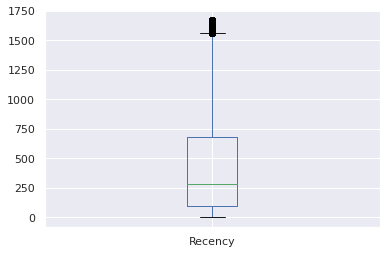

In [ ]:
tx_user['Recency'].plot(kind='box')

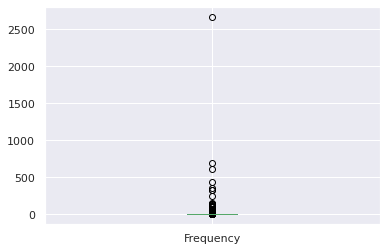

In [ ]:

tx_user['Frequency'].plot(kind='box')

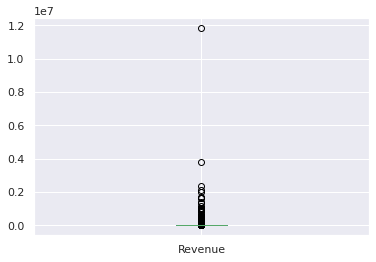

In [ ]:
tx_user['Revenue'].plot(kind='box')

In [ ]:
#tx_user['Revenue']=np.log(tx_user['Revenue'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

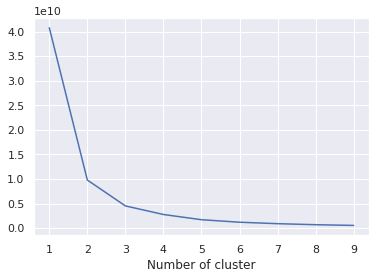

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [ ]:
tx_user.groupby(['RecencyCluster'])['Recency'].describe()

count         mean         std  ...     50%     75%     max
RecencyCluster                                     ...                        
0                23227.0  1280.773496  158.683591  ...  1242.0  1391.5  1673.0
1                60580.0   447.999208  108.946804  ...   440.0   539.0   655.0
2                43605.0   865.217934  123.492545  ...   870.0   973.0  1073.0
3               126072.0   109.853203   79.423730  ...    97.0   172.0   277.0

[4 rows x 8 columns]

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

In [ ]:
tx_user.groupby(['FrequencyCluster'])['Frequency'].describe()

count         mean         std  ...     50%     75%     max
FrequencyCluster                                     ...                        
0                  17916.0     7.384963    4.755606  ...     6.0     8.0   157.0
1                 235560.0     1.504203    0.832602  ...     1.0     2.0     4.0
2                      1.0  2668.000000         NaN  ...  2668.0  2668.0  2668.0
3                      7.0   429.571429  161.590900  ...   360.0   525.5   688.0

[4 rows x 8 columns]

In [ ]:
tx_user['Frequency'].describe()

count    253484.000000
mean          1.942190
std           6.182509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2668.000000
Name: Frequency, dtype: float64

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

In [ ]:
tx_user.groupby(['RevenueCluster'])['Revenue'].describe()

count          mean  ...           75%          max
RevenueCluster                          ...                           
0               246085.0  5.891824e+03  ...  7.328790e+03     48488.23
1                    1.0  1.185973e+07  ...  1.185973e+07  11859728.34
2                 7378.0  9.128243e+04  ...  1.006524e+05    657705.63
3                   20.0  1.424063e+06  ...  1.655018e+06   3801248.91

[4 rows x 8 columns]

In [ ]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Recency   Frequency       Revenue
OverallScore                                       
0             1227.906606    5.943052  2.014409e+04
1             1142.220469    2.270378  7.138380e+03
2              465.613099    1.710571  6.160246e+03
3              747.132489    2.508659  8.982084e+03
4              115.662185    1.530074  6.101190e+03
5              305.979481    8.530570  9.380537e+04
6              110.458781    3.758065  1.036541e+05
7               38.000000    4.000000  8.702753e+05
8                0.000000  333.000000  7.727013e+04
9               91.000000  445.666667  1.874072e+06

In [ ]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>3,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>7,'Segment'] = 'High-Value' 

In [ ]:
tx_user['Segment'].value_counts()

Low-Value     132674
Mid-Value     120803
High-Value         7
Name: Segment, dtype: int64

In [ ]:
fig = px.scatter(tx_user, x="Recency", y="Revenue", color="Segment")
fig.show()

# **Customer Lifet time value**

In [ ]:
inv_cust_plant.head()

CITY Cust Type Customer No.  ...   City        State  Invoice_Date
0     Thane    Retail        67849  ...  Thane  Maharashtra    2015-01-02
1     THNAE    Retail        84419  ...  Thane  Maharashtra    2015-01-03
2  THANE[W]    Retail        81055  ...  Thane  Maharashtra    2015-01-03
3     THNAE    Retail        84419  ...  Thane  Maharashtra    2015-01-03
4     THANE    Retail        18980  ...  Thane  Maharashtra    2015-01-03

[5 rows x 32 columns]

In [ ]:
avp=tx_user[['CustomerID','Recency','Frequency','Revenue']]

In [ ]:
avp['Avg Purchase value of customer']=avp['Revenue']/avp['Frequency']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cars_group =inv_cust_plant.groupby(['Make','State','City','Order Type']).agg({'Invoice_DateTime': lambda date: (date.max() - date.min()).days,
                                                                      'Customer No.' : lambda num: len(num),
                                                                      'Total Amt Wtd Tax.': lambda price : price.sum()})

In [ ]:
cars_group.columns = ['service_days','avg_freq','total_revenue']
cars_group

service_days  ...  total_revenue
Make  State          City            Order Type                     ...               
AUDI  Andhra Pradesh Anantapur       Running Repairs             0  ...        1619.14
                     Kakinada        Running Repairs           146  ...        4176.02
                     Kurnool         Running Repairs            63  ...       21834.92
                     Ongole          Running Repairs             0  ...        3653.31
                     Vijayawada      Accidental                  0  ...      123721.58
...                                                            ...  ...            ...
VOLVO Tamil Nadu     Thanjavur       Running Repairs             0  ...         305.63
                     Tiruchirappalli Running Repairs             0  ...         178.00
      Telangana      Balanagar       Running Repairs             0  ...       10500.20
                     Madeenaguda     Running Repairs             0  ...        9215.14
      Uttar Pradesh  Greater Noida   Running Repairs             0  ...        2100.44

[9206 rows x 3 columns]

In [ ]:
#calculating avg order value
cars_group['avg_order_value'] = cars_group['total_revenue']/cars_group['avg_freq']
cars_group.head()

service_days  ...  avg_order_value
Make State          City       Order Type                     ...                 
AUDI Andhra Pradesh Anantapur  Running Repairs             0  ...      1619.140000
                    Kakinada   Running Repairs           146  ...       596.574286
                    Kurnool    Running Repairs            63  ...     10917.460000
                    Ongole     Running Repairs             0  ...      3653.310000
                    Vijayawada Accidental                  0  ...    123721.580000

[5 rows x 4 columns]

In [ ]:
cars_group_tm = cars_group.reset_index()


In [ ]:
cars_group_tm.shape


(9206, 8)

In [ ]:
#customer wise avg freq and revenue values

inv_cust_avg=inv_cust_plant.groupby(['Customer No.','Make','State','City','Order Type']).agg({'Invoice_DateTime': lambda date: (date.max() - date.min()).days,
                                                                      'Customer No.' : lambda num: len(num),
                                                                      'Total Amt Wtd Tax.': lambda price : price.sum()})

In [ ]:
inv_cust_avg.columns= ['service_days_c','avg_freq_c','total_revenue_c']

In [ ]:
inv_cust_avg

service_days_c  ...  total_revenue_c
Customer No. Make                 State         City       Order Type                       ...                 
1            MARUTI SUZUKI        Maharashtra   Pune       Paid Service                132  ...             0.00
                                                           Running Repairs               0  ...             0.00
10           GENERAL MOTORS       Maharashtra   Thane      Paid Service                439  ...         10505.72
                                                           Running Repairs               0  ...           599.84
100          HONDA                Maharashtra   Andheri    Accidental                    0  ...         14167.07
...                                                                                    ...  ...              ...
PLX241       MARUTI SUZUKI        Uttarakhand   Kashipur   Running Repairs               0  ...          3477.37
PLX277       TATA MOTORS          West Bengal   Jalpaiguri Running Repairs               0  ...          6870.95
PLX312       MAHINDRA &  MAHINDRA Maharashtra   Pune       Running Repairs               0  ...           567.80
PLX380       MAHINDRA &  MAHINDRA Uttar Pradesh Meerut     Running Repairs               0  ...          4346.98
PLX386       HYUNDAI              Telangana     Nizamabad  Running Repairs               0  ...             0.00

[348946 rows x 3 columns]

In [ ]:
inv_cust_avg['avg_order_value_c']=inv_cust_avg['total_revenue_c']/inv_cust_avg['avg_freq_c']

In [ ]:
inv_cust_avg=inv_cust_avg.reset_index()

In [ ]:
inv_cust_avg.shape

(348946, 9)

In [ ]:

#Merging ltv_customer data and cars group
ltv_data = pd.merge(cars_group_tm,inv_cust_avg,how='left',on = ['Make','State','City','Order Type'])

In [ ]:
ltv_data.shape

(348946, 13)

In [ ]:
ltv_data.head()

Make           State  ... total_revenue_c avg_order_value_c
0  AUDI  Andhra Pradesh  ...         1619.14           1619.14
1  AUDI  Andhra Pradesh  ...          958.76            479.38
2  AUDI  Andhra Pradesh  ...         1304.22            434.74
3  AUDI  Andhra Pradesh  ...          434.74            434.74
4  AUDI  Andhra Pradesh  ...         1478.30           1478.30

[5 rows x 13 columns]

In [ ]:
inv_cust_plant

CITY Cust Type  ...        State Invoice_Date
0                                     Thane    Retail  ...  Maharashtra   2015-01-02
1                                     THNAE    Retail  ...  Maharashtra   2015-01-03
2                                  THANE[W]    Retail  ...  Maharashtra   2015-01-03
3                                     THNAE    Retail  ...  Maharashtra   2015-01-03
4                                     THANE    Retail  ...  Maharashtra   2015-01-03
...                                     ...       ...  ...          ...          ...
492309                              Chennai    Retail  ...   Tamil Nadu   2016-06-30
492310                           ADAMBAKKAM    Retail  ...   Tamil Nadu   2016-06-30
492311                              CHENNAI    Retail  ...   Tamil Nadu   2016-06-30
492312  Vijaya Nagar, 1 main road,Velacherr    Retail  ...   Tamil Nadu   2016-06-30
492313                             saidapet    Retail  ...   Tamil Nadu   2016-06-30

[492314 rows x 32 columns]

In [ ]:

#calculating gloabal avg value by customer 
global_avg_value_c = ltv_data['avg_order_value_c'].sum()/ltv_data.shape[0]
global_avg_value_c

4605.900268897821

In [ ]:
#calculating global_avg_value by car
global_avg_value = ltv_data['avg_order_value'].sum()/ltv_data.shape[0]
global_avg_value

4661.100741298584

In [ ]:

#Replace avg_order_value <= 0 by global_avg_value
ltv_data.loc[ltv_data['avg_order_value']<=0, 'avg_order_value'] = global_avg_value

In [ ]:
ltv_data.loc[ltv_data['avg_order_value_c'] <=0, 'avg_order_value_c'] =ltv_data['avg_order_value']


In [ ]:
#Replacing total revenue of customer by product of avg_freq_c and avg_order_value_c
ltv_data.loc[(ltv_data['total_revenue_c'] <=0), 'total_revenue_c'] = ltv_data['avg_freq_c']*ltv_data['avg_order_value_c']

In [ ]:
ltv_data.head()

Make           State  ... total_revenue_c avg_order_value_c
0  AUDI  Andhra Pradesh  ...         1619.14           1619.14
1  AUDI  Andhra Pradesh  ...          958.76            479.38
2  AUDI  Andhra Pradesh  ...         1304.22            434.74
3  AUDI  Andhra Pradesh  ...          434.74            434.74
4  AUDI  Andhra Pradesh  ...         1478.30           1478.30

[5 rows x 13 columns]

In [ ]:
ltv_data['service_years_c']=ltv_data['service_days_c']/365

In [ ]:
ltv_data.head()

Make           State  ... avg_order_value_c service_years_c
0  AUDI  Andhra Pradesh  ...           1619.14        0.000000
1  AUDI  Andhra Pradesh  ...            479.38        0.238356
2  AUDI  Andhra Pradesh  ...            434.74        0.139726
3  AUDI  Andhra Pradesh  ...            434.74        0.000000
4  AUDI  Andhra Pradesh  ...           1478.30        0.000000

[5 rows x 14 columns]

In [ ]:
#customer lifetime value
#considering lifetime span of a car is of 10 years
#average years customer stays with the services we can calculate the clv 
ltv_data['CLV']=ltv_data['avg_order_value_c']*0.142096

In [ ]:
ltv_data['CLV'].describe()

count    348946.000000
mean        686.562579
std        1562.226128
min           0.000355
25%          85.138239
50%         303.138370
75%         683.340019
max       92107.123115
Name: CLV, dtype: float64

In [ ]:
#ltv_data['CLV_2'] = (ltv_data['avg_order_value_c'] * 0.142 * 0.05)/0.77
print("0.25 quantile :",ltv_data['CLV'].quantile(0.25))
print("0.50 quantile :",ltv_data['CLV'].quantile(0.50))
print("0.75 quantile :",ltv_data['CLV'].quantile(0.75))
print("0.95 quantile :",ltv_data['CLV'].quantile(0.95))
print("minimum LTV :",ltv_data['CLV'].min())
print("maximum LTV :",ltv_data['CLV'].max())
print("mean LTV :",ltv_data['CLV'].mean())

0.25 quantile : 85.13823936
0.50 quantile : 303.13837016
0.75 quantile : 683.3400192400001
0.95 quantile : 2472.38105714
minimum LTV : 0.00035524
maximum LTV : 92107.12311504
mean LTV : 686.562579330197


In [ ]:
print(ltv_data[ltv_data["CLV"]<=ltv_data['CLV'].quantile(0.50)].shape)
print(ltv_data[(ltv_data["CLV"]>ltv_data['CLV'].quantile(0.50)) & (ltv_data["CLV"]<=ltv_data['CLV'].quantile(0.95))].shape)
print(ltv_data[ltv_data["CLV"]>ltv_data['CLV'].quantile(0.95)].shape)

(174473, 15)
(157025, 15)
(17448, 15)


In [ ]:
bins=[0,ltv_data['CLV'].quantile(0.50),ltv_data['CLV'].quantile(0.75),ltv_data['CLV'].max()]
labels=["Low","Medium","High"]
ltv_data["CLV Binned"]=pd.cut(ltv_data["CLV"], bins=bins, labels=labels)

In [ ]:
ltv_data

Make           State  ...          CLV CLV Binned
0        AUDI  Andhra Pradesh  ...   230.073317        Low
1        AUDI  Andhra Pradesh  ...    68.117980        Low
2        AUDI  Andhra Pradesh  ...    61.774815        Low
3        AUDI  Andhra Pradesh  ...    61.774815        Low
4        AUDI  Andhra Pradesh  ...   210.060517        Low
...       ...             ...  ...          ...        ...
348941  VOLVO      Tamil Nadu  ...    43.428800        Low
348942  VOLVO      Tamil Nadu  ...    25.293088        Low
348943  VOLVO       Telangana  ...  1492.036419       High
348944  VOLVO       Telangana  ...  1309.434533       High
348945  VOLVO   Uttar Pradesh  ...   298.464122        Low

[348946 rows x 16 columns]

In [ ]:
ltv_data["CLV Binned"].value_counts()


Low       174473
High       87237
Medium     87236
Name: CLV Binned, dtype: int64

In [ ]:
ltv_data.isnull().sum()


Make                 0
State                0
City                 0
Order Type           0
service_days         0
avg_freq             0
total_revenue        0
avg_order_value      0
Customer No.         0
service_days_c       0
avg_freq_c           0
total_revenue_c      0
avg_order_value_c    0
service_years_c      0
CLV                  0
CLV Binned           0
dtype: int64

In [ ]:
ltv_data

Make           State  ...          CLV CLV Binned
0        AUDI  Andhra Pradesh  ...   230.073317        Low
1        AUDI  Andhra Pradesh  ...    68.117980        Low
2        AUDI  Andhra Pradesh  ...    61.774815        Low
3        AUDI  Andhra Pradesh  ...    61.774815        Low
4        AUDI  Andhra Pradesh  ...   210.060517        Low
...       ...             ...  ...          ...        ...
348941  VOLVO      Tamil Nadu  ...    43.428800        Low
348942  VOLVO      Tamil Nadu  ...    25.293088        Low
348943  VOLVO       Telangana  ...  1492.036419       High
348944  VOLVO       Telangana  ...  1309.434533       High
348945  VOLVO   Uttar Pradesh  ...   298.464122        Low

[348946 rows x 16 columns]

In [ ]:
ltv_data_copy = ltv_data[['Make','State','City','Order Type','total_revenue_c','service_days_c','CLV Binned']]


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit,RepeatedKFold
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,mean_squared_log_error

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
le=LabelEncoder()
ltv_data_copy["Make"]=le.fit_transform(ltv_data_copy["Make"])
#ltv_data_copy["Model"]=le.fit_transform(ltv_data_copy["Model"])
ltv_data_copy["State"]=le.fit_transform(ltv_data_copy["State"])
ltv_data_copy["City"]=le.fit_transform(ltv_data_copy["City"])
ltv_data_copy["Order Type"]=le.fit_transform(ltv_data_copy["Order Type"])
ltv_data_copy["CLV Binned"]=le.fit_transform(ltv_data_copy["CLV Binned"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:

X = ltv_data_copy.drop(['CLV Binned'],axis=1)
y = ltv_data_copy['CLV Binned']

In [ ]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26109
           1       1.00      0.98      0.99     52361
           2       0.95      0.94      0.95     26214

    accuracy                           0.97    104684
   macro avg       0.96      0.97      0.97    104684
weighted avg       0.97      0.97      0.97    104684



In [ ]:
print("Training Accuracy :" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy : 0.9718772687325666
Testing Accuracy : 0.9733687597743407


<BarContainer object of 6 artists>

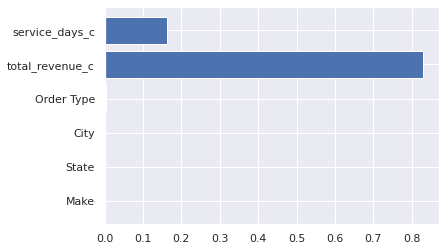

In [ ]:
plt.barh(list(X),list(dt.feature_importances_))


In [ ]:

rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26109
           1       1.00      0.97      0.98     52361
           2       0.94      0.94      0.94     26214

    accuracy                           0.97    104684
   macro avg       0.96      0.97      0.97    104684
weighted avg       0.97      0.97      0.97    104684



In [ ]:
y_pred_rfc

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
accuracy_score(y_test,y_pred_rfc)
from sklearn import metrics


In [ ]:
print("R-Square:",metrics.r2_score(y_test, y_pred_rfc))


R-Square: 0.8510976877866723


In [ ]:
#using regression model
ltv_data_reg = ltv_data[['Make','State','City','Order Type','total_revenue_c','service_days_c','CLV']]


In [ ]:
X = ltv_data_reg.drop(['CLV'],axis=1)
y = ltv_data_reg['CLV']

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=0)

In [ ]:
le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
#X["Model"]=le.fit_transform(X["Model"])
X["State"]=le.fit_transform(X["State"])
X["City"]=le.fit_transform(X["City"])
X["Order Type"]=le.fit_transform(X["Order Type"])

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1129.5537710682825
[ 1.77667363e+00  2.04956099e+00 -4.81195848e-01 -2.24246023e+02
  3.98006483e-02 -8.08871990e-01]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.4896398367077447


In [ ]:
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include=['object','category']).columns
    return dataset[cat_columns]
check_categorical(ltv_data_reg)

Make           State             City       Order Type
0        AUDI  Andhra Pradesh        Anantapur  Running Repairs
1        AUDI  Andhra Pradesh         Kakinada  Running Repairs
2        AUDI  Andhra Pradesh         Kakinada  Running Repairs
3        AUDI  Andhra Pradesh         Kakinada  Running Repairs
4        AUDI  Andhra Pradesh         Kakinada  Running Repairs
...       ...             ...              ...              ...
348941  VOLVO      Tamil Nadu        Thanjavur  Running Repairs
348942  VOLVO      Tamil Nadu  Tiruchirappalli  Running Repairs
348943  VOLVO       Telangana        Balanagar  Running Repairs
348944  VOLVO       Telangana      Madeenaguda  Running Repairs
348945  VOLVO   Uttar Pradesh    Greater Noida  Running Repairs

[348946 rows x 4 columns]

In [ ]:
#To find multicollinearity between independent categorical features
import scipy.stats as ss

def cramers_v_correlation(col1, col2):
    matrix = pd.crosstab(ltv_data_reg[col1],ltv_data_reg[col2])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col_1 in list(check_categorical(ltv_data_reg).columns):
    for col_2 in list(check_categorical(ltv_data_reg).columns):
        if((cramers_v_correlation(col_1,col_2)>0.6) and (col_1!=col_2)):
            print(col_1,"to",col_2,"correlation is",cramers_v_correlation(col_1,col_2))

State to City correlation is 0.9991148053763241
City to State correlation is 0.9991148053763241


In [ ]:

X1=X.drop(['City'],1)
X1.columns

Index(['Make', 'State', 'Order Type', 'total_revenue_c', 'service_days_c'], dtype='object')

In [ ]:
le=LabelEncoder()
X1["Make"]=le.fit_transform(X1["Make"])
X1["Order Type"]=le.fit_transform(X1["Order Type"])

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.3,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1065.3910727320615
[ 1.72147504e+00  3.18050597e+00 -2.24411609e+02  3.98242789e-02
 -8.16540737e-01]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.48950578134593337


In [ ]:
categorical_cols1 = ['Make','Order Type']


In [ ]:
X_total = pd.get_dummies(X1, columns=categorical_cols1)
X_total

State  total_revenue_c  ...  Order Type_7  Order Type_8
0           1          1619.14  ...             0             0
1           1           958.76  ...             0             0
2           1          1304.22  ...             0             0
3           1           434.74  ...             0             0
4           1          1478.30  ...             0             0
...       ...              ...  ...           ...           ...
348941     18           305.63  ...             0             0
348942     18           178.00  ...             0             0
348943     19         10500.20  ...             0             0
348944     19          9215.14  ...             0             0
348945     20          2100.44  ...             0             0

[348946 rows x 40 columns]

In [ ]:
X_total = pd.get_dummies(X1, columns=categorical_cols1, drop_first=True)

#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y,test_size=0.3,random_state=0)

In [ ]:

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2279.3035125672855
[ 1.97760104e+00  3.76588450e-02 -7.37279614e-01 -3.42928053e+02
 -6.73694780e+02 -5.75801984e+02 -5.86163935e+02 -6.27041989e+02
 -5.82260061e+02 -6.90630872e+02 -6.60527373e+02 -6.65598241e+02
 -4.78152125e+02 -1.21318145e+02 -4.11550563e+02 -6.99947686e+02
 -1.21960044e+02 -3.91965224e+02 -9.37242837e+02 -7.01790928e+02
 -1.15142789e+03 -4.43198041e+02 -6.36245109e+02 -6.92233732e+02
 -4.69107478e+02 -1.83764597e+02 -5.83477093e+02 -5.56467746e+02
 -6.42169901e+02 -7.05690570e+02 -1.35352836e+03 -1.21161643e+03
 -1.23042860e+03 -1.45029337e+03 -1.44110671e+03 -1.30838272e+03
 -9.28519141e+02 -1.21526453e+03]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.5111860041915668


In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the RMSLE of our predictions
from sklearn.metrics import mean_squared_log_error
print("RMSLE:", np.sqrt(mean_squared_log_error( y_test, abs(y_pred))))

MAE: 399.45038296300055
MSE 1121166.8560908234
RMSE: 1058.8516685970815
RMSLE: 1.3163444255605101


In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# fit the model to the training data (learn the coefficients)
model_lgb.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_lgb.predict(X_test)

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# compute the RMSLE of our predictions
from sklearn.metrics import mean_squared_log_error
print("RMSLE:", np.sqrt(mean_squared_log_error( y_test, abs(y_pred))))

R-Square: 0.7617184998662438
MAE: 161.69066949572536
MSE 546533.697194436
RMSE: 739.2791740570243
RMSLE: 0.7544701259323656
